In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Create sample data
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'Target':   [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

In [32]:
# Define features and target
X = df[['Feature1', 'Feature2']]
y = df['Target']

In [33]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training Features:\n", X_train)
print("\nTraining Target:\n", y_train)

Training Features:
    Feature1  Feature2
0         1        10
7         8         3
2         3         8
9        10         1
4         5         6
3         4         7
6         7         4

Training Target:
 0    0
7    1
2    0
9    1
4    0
3    1
6    0
Name: Target, dtype: int64


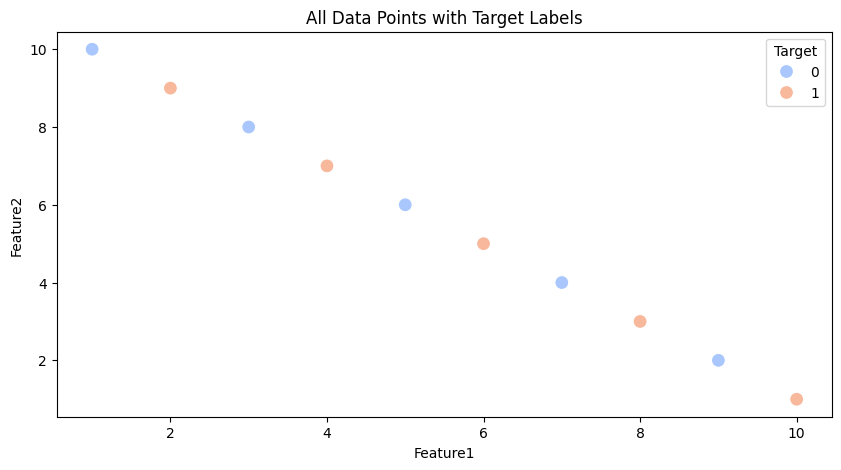

In [34]:
# Plot all data points colored by target
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='Target', palette='coolwarm', s=100)
plt.title('All Data Points with Target Labels')
plt.show()

In [ ]:
# Assume 'Sensor1', 'Sensor2', ... are numerical features
sensor_cols = [col for col in df.columns if 'Sensor' in col]
X = df[sensor_cols]

In [ ]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(X)


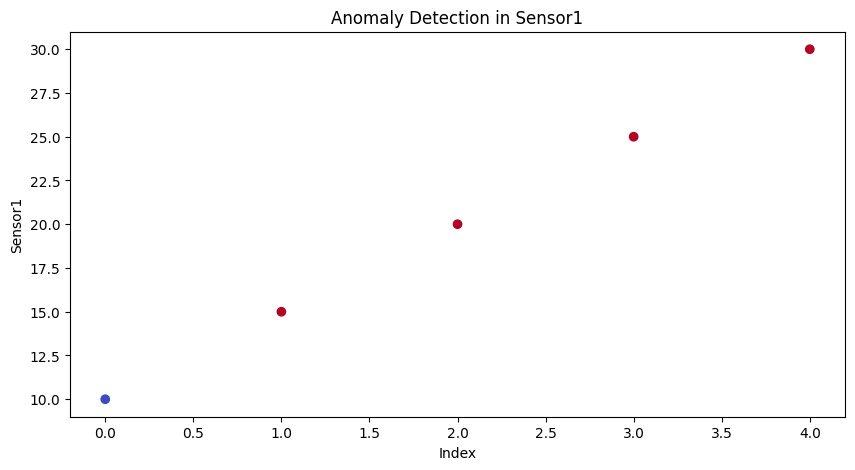

In [ ]:
# 📊 Visualize anomalies
plt.figure(figsize=(10, 5))
plt.scatter(df.index, df['Sensor1'], c=df['anomaly'], cmap='coolwarm')
plt.xlabel("Index")
plt.ylabel("Sensor1")
plt.title("Anomaly Detection in Sensor1")
plt.show()


In [ ]:
# 🔎 Anomalies count
print("\nAnomalies detected:")
print(df['anomaly'].value_counts())


Anomalies detected:
anomaly
 1    4
-1    1
Name: count, dtype: int64


In [ ]:
# Assume 'Failure' column (0: No failure, 1: Failure) is the target
if 'Failure' in df.columns:
    X = df[sensor_cols]
    y = df['Failure']

Text(0.5, 1.0, 'Training Data')

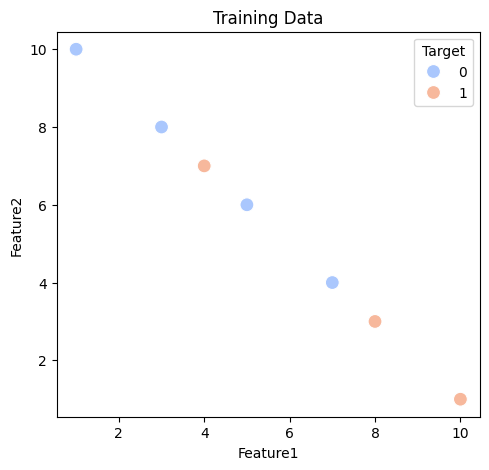

In [35]:
# Plot training and testing splits separately
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train['Feature1'], y=X_train['Feature2'], hue=y_train, palette='coolwarm', s=100)
plt.title('Training Data')

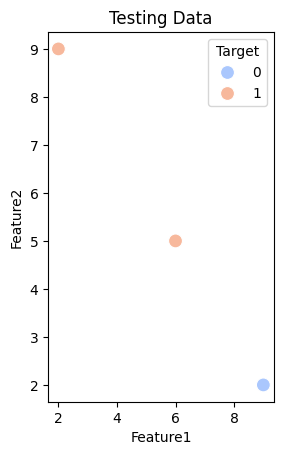

In [36]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test['Feature1'], y=X_test['Feature2'], hue=y_test, palette='coolwarm', s=100)
plt.title('Testing Data')

plt.show()